## Leading Causes of Death Around the World

In [328]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import requests
import time
import scipy.stats as st
from pprint import pprint

In [329]:
# Pull in csv files 
annual_num_deaths_csv = ("../Resources/annual-number-of-deaths-by-cause.csv")
mortality_df = pd.read_csv(annual_num_deaths_csv)
mortality_df = mortality_df.dropna(how='all')

# Second csv for later use
socio_csv = ("../Resources/soci_econ_country_profiles.csv")
socio_df = pd.read_csv(socio_csv)
# socio_df.head()

Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)

In [330]:
# Renaming columns
# Create list of existing columns
column_list = mortality_df.columns

# New column names
new_mort_list = []

for columns in range(len(column_list)):
    new = column_list[columns].replace("Deaths - ","")
    new_two = new.replace(" - Sex: Both - Age: All Ages (Number)", "")
    new_mort_list.append(new_two)

In [331]:
mortality_df.columns = new_mort_list
mortality_df = mortality_df.rename(columns={'Entity':'Country'})
# print(mortality_df['Country'].unique())

In [332]:
# Filter by Years (2014 to 2018)
year = mortality_df['Year']
year = year.astype(int)
year_df = pd.DataFrame(mortality_df.loc[(year >= 2014) & (year <= 2018)])

# Calculating total mortality rate
mort = year_df.iloc[:,3:36]
total_deaths = mort.sum(axis=1)
# Adding column with total mortality rate, per year
year_df['Total Number of Deaths'] = total_deaths
year_df.head()

,Country,Code,Year,Number of executions (Amnesty International),Meningitis,Neoplasms,"Fire, heat, and hot substances",Malaria,Drowning,Interpersonal violence,...,Terrorism (deaths),Cardiovascular diseases,Chronic kidney disease,Chronic respiratory diseases,Cirrhosis and other chronic liver diseases,Digestive diseases,Acute hepatitis,Alzheimer's disease and other dementias,Parkinson's disease,Total Number of Deaths
6,Afghanistan,AFG,2014,6,1935.0,18462.0,463.0,228.0,1757.0,4420.0,...,5414.0,55932.0,5055.0,6851.0,3454.0,6522.0,2134.0,1620.0,502.0,211369.0
7,Afghanistan,AFG,2015,1,1821.0,18876.0,463.0,284.0,1730.0,5039.0,...,6216.0,56875.0,5153.0,6835.0,3492.0,6555.0,2065.0,1652.0,511.0,217939.0
8,Afghanistan,AFG,2016,6,1795.0,19459.0,471.0,388.0,1742.0,5033.0,...,6142.0,57970.0,5296.0,6894.0,3578.0,6673.0,2044.0,1690.0,524.0,223712.0
27,Afghanistan,AFG,2017,NaN,1665.0,20111.0,476.0,399.0,1723.0,5191.0,...,6092.0,59553.0,5419.0,6982.0,3693.0,6841.0,2046.0,1728.0,537.0,217207.0
28,Afghanistan,AFG,2018,NaN,1576.0,20673.0,475.0,466.0,1669.0,5500.0,...,NaN,60893.0,5531.0,7036.0,3732.0,6861.0,1972.0,1757.0,551.0,219391.0


In [333]:
# year_df.sort_values('Total Number of Deaths', ascending=False, inplace=False)

# code.isnull().values

drop = ['OWID_WRL','OWID_KOS']
code = year_df.loc[year_df["Code"].notnull()]

code = code.set_index('Code')
code = code.drop(drop)
code.reset_index()


# code.sort_values('Total Number of Deaths', ascending=False, inplace=False)

,Code,Country,Year,Number of executions (Amnesty International),Meningitis,Neoplasms,"Fire, heat, and hot substances",Malaria,Drowning,Interpersonal violence,...,Terrorism (deaths),Cardiovascular diseases,Chronic kidney disease,Chronic respiratory diseases,Cirrhosis and other chronic liver diseases,Digestive diseases,Acute hepatitis,Alzheimer's disease and other dementias,Parkinson's disease,Total Number of Deaths
0,AFG,Afghanistan,2014,6,1935.0,18462.0,463.0,228.0,1757.0,4420.0,...,5414.0,55932.0,5055.0,6851.0,3454.0,6522.0,2134.0,1620.0,502.0,211369.0
1,AFG,Afghanistan,2015,1,1821.0,18876.0,463.0,284.0,1730.0,5039.0,...,6216.0,56875.0,5153.0,6835.0,3492.0,6555.0,2065.0,1652.0,511.0,217939.0
2,AFG,Afghanistan,2016,6,1795.0,19459.0,471.0,388.0,1742.0,5033.0,...,6142.0,57970.0,5296.0,6894.0,3578.0,6673.0,2044.0,1690.0,524.0,223712.0
3,AFG,Afghanistan,2017,NaN,1665.0,20111.0,476.0,399.0,1723.0,5191.0,...,6092.0,59553.0,5419.0,6982.0,3693.0,6841.0,2046.0,1728.0,537.0,217207.0
4,AFG,Afghanistan,2018,NaN,1576.0,20673.0,475.0,466.0,1669.0,5500.0,...,NaN,60893.0,5531.0,7036.0,3732.0,6861.0,1972.0,1757.0,551.0,219391.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,ZWE,Zimbabwe,2014,NaN,1422.0,10857.0,615.0,3685.0,734.0,1257.0,...,0.0,16356.0,2057.0,2715.0,1952.0,4138.0,146.0,741.0,212.0,132306.0
1016,ZWE,Zimbabwe,2015,NaN,1439.0,11161.0,632.0,2518.0,770.0,1302.0,...,NaN,16649.0,2108.0,2751.0,1956.0,4202.0,146.0,754.0,215.0,130079.0
1017,ZWE,Zimbabwe,2016,NaN,1457.0,11465.0,648.0,2050.0,801.0,1342.0,...,NaN,16937.0,2160.0,2788.0,1962.0,4264.0,146.0,767.0,219.0,128275.0
1018,ZWE,Zimbabwe,2017,NaN,1460.0,11744.0,654.0,2116.0,818.0,1363.0,...,0.0,17187.0,2196.0,2818.0,2007.0,4342.0,144.0,781.0,223.0,126515.0


In [334]:
# # Sort by top causes of death (outside source???)
# clean_df = year_df[["Country","Year","Neoplasms","Lower respiratory infections","Neonatal disorders","Cardiovascular diseases","Chronic respiratory diseases",'Total Number of Deaths']]
# clean_df.head()

In [335]:
socio_df.head()

,Unnamed: 0,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),...,"Inflation, consumer prices (annual %)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",Military expenditure (% of GDP),"Population, female","Population, male",Tax revenue (% of GDP),"Taxes on income, profits and capital gains (% of revenue)",Urban population (% of total population)_y
0,0,Argentina,SouthAmerica,2780400,44271,16.2,95.9,632343,2.4,14564.5,...,NaN,79.726,72.924,76.372000,0.856138,22572521.0,21472290.0,10.955501,12.929913,91.749
1,1,Australia,Oceania,7692060,24451,3.2,99.3,1230859,2.4,51352.2,...,1.948647,84.600,80.500,82.500000,2.007966,12349632.0,12252228.0,21.915859,64.110306,85.904
2,2,Austria,WesternEurope,83871,8736,106.0,96.2,376967,1.0,44117.7,...,2.081269,84.000,79.400,81.643902,0.756179,4478340.0,4319226.0,25.355237,27.024073,58.094
3,3,Belarus,EasternEurope,207600,9468,46.7,87.0,54609,-3.9,5750.8,...,6.031837,79.200,69.300,74.129268,1.162417,5077542.0,4420722.0,13.019006,2.933101,78.134
4,4,Belgium,WesternEurope,30528,11429,377.5,97.3,455107,1.5,40277.8,...,2.125971,83.900,79.200,81.492683,0.910371,5766141.0,5609017.0,23.399721,33.727746,97.961


In [336]:
# Cleaning new DataFrame, prepping for merge
socio2_df = socio_df[['country','Life expectancy at birth, total (years)','GDP per capita (current US$)','Health: Total expenditure (% of GDP)','Health: Physicians (per 1000 pop.)','Health Care Index','Population, female','Population, male']]
socio2_df = socio2_df.rename(columns={
    'Life expectancy at birth, total (years)':'Life Expectancy at birth',
    'GDP per capita (current US$)':'GDP per capita ($)',
    'Health: Total expenditure (% of GDP)':'Total expenditure (% GDP)',
    'Health: Physicians (per 1000 pop.)':'Physicians (per 1000)',
})

In [337]:
# Merging 
new_df = code.merge(socio2_df, how='inner', left_on='Country', right_on='country')
new_df = new_df.drop('country', 1)

# New Population column by combining male and female population
new_df['Population'] = new_df['Population, female'] + new_df['Population, male']
pop = new_df['Population']
# Drop male, female population columns, executions, terrorism
new_df = new_df.drop(['Population, female','Population, male','Number of executions (Amnesty International)','Terrorism (deaths)'],1)

total_death_rate = (new_df['Total Number of Deaths'] / pop)*100
new_df['Total Death Rate'] = total_death_rate

new_df.columns
# drop_columns = ['Meningitis','Fire, heat, and hot substances', 'Malaria', 'Drowning',
#        'Interpersonal violence', 'HIV/AIDS', 'Drug use disorders',
#        'Tuberculosis', 'Road injuries', 'Maternal disorders','Neonatal disorders',
#        'Alcohol use disorders', 'Exposure to forces of nature',
#        'Diarrheal diseases', 'Environmental heat and cold exposure',
#        'Nutritional deficiencies', 'Self-harm', 'Conflict and terrorism',
#        'Diabetes mellitus', 'Poisonings', 'Protein-energy malnutrition','Chronic kidney disease','Cirrhosis and other chronic liver diseases', 'Digestive diseases',
#        'Acute hepatitis', "Alzheimer's disease and other dementias","Parkinson's disease"]

clean_columns = ['Country', 'Year','Neoplasms','Lower respiratory infections','Cardiovascular diseases',
                 'Chronic respiratory diseases','Total Number of Deaths','Life Expectancy at birth', 'GDP per capita ($)',
                 'Total expenditure (% GDP)', 'Physicians (per 1000)','Health Care Index', 'Population', 'Total Death Rate']

clean_df = new_df[clean_columns]
clean_df

,Country,Year,Neoplasms,Lower respiratory infections,Cardiovascular diseases,Chronic respiratory diseases,Total Number of Deaths,Life Expectancy at birth,GDP per capita ($),Total expenditure (% GDP),Physicians (per 1000),Health Care Index,Population,Total Death Rate
0,Argentina,2014,76832.0,34668.0,93640.0,17789.0,312071.0,76.372,14564.5,4.8,3.8,73.30,44044811.0,0.708531
1,Argentina,2015,78388.0,36109.0,95955.0,18280.0,319105.0,76.372,14564.5,4.8,3.8,73.30,44044811.0,0.724501
2,Argentina,2016,81304.0,38173.0,100391.0,19026.0,332157.0,76.372,14564.5,4.8,3.8,73.30,44044811.0,0.754134
3,Argentina,2017,83141.0,37601.0,101975.0,19334.0,336212.0,76.372,14564.5,4.8,3.8,73.30,44044811.0,0.763341
4,Argentina,2018,83676.0,36482.0,100742.0,19145.0,333808.0,76.372,14564.5,4.8,3.8,73.30,44044811.0,0.757883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,Vietnam,2014,95150.0,21646.0,222872.0,33943.0,568837.0,75.241,2067.9,7.1,1.2,47.87,94596642.0,0.601329
291,Vietnam,2015,98218.0,21572.0,225569.0,34289.0,577667.0,75.241,2067.9,7.1,1.2,47.87,94596642.0,0.610663
292,Vietnam,2016,101684.0,21492.0,228957.0,34806.0,588196.0,75.241,2067.9,7.1,1.2,47.87,94596642.0,0.621794
293,Vietnam,2017,105181.0,21460.0,232646.0,35312.0,598804.0,75.241,2067.9,7.1,1.2,47.87,94596642.0,0.633008


In [338]:
life_expect = clean_df['Life Expectancy at birth']
phys = clean_df["Physicians (per 1000)"]
spend = clean_df["Total expenditure (% GDP)"]
hci = clean_df["Health Care Index"]
tdr = clean_df['Total Death Rate']

def tdr_plot(y, ylabel):
    plt.figure(figsize=(8,8))
    plt.scatter(tdr, y)
    plt.ylabel(ylabel)
    plt.xlabel('Death Rate per 1000')
    plt.title(f'Death Rate vs. {ylabel}')

#     (slope, intercept, rvalue, pvalue, stderr) = st.linregress(tdr, y)
#     reg_values = np.array(tdr) * slope + intercept
#     line = f'y = {(round(slope,2))} x +{(round(intercept,2))}'

#     plt.plot(tdr,reg_values,c="purple")
#     plt.show

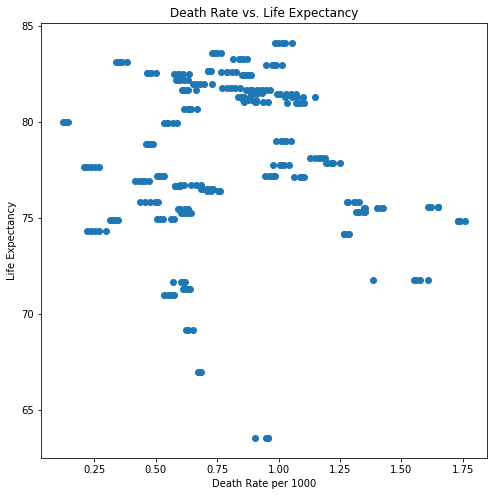

In [339]:
tdr_plot(life_expect, "Life Expectancy")

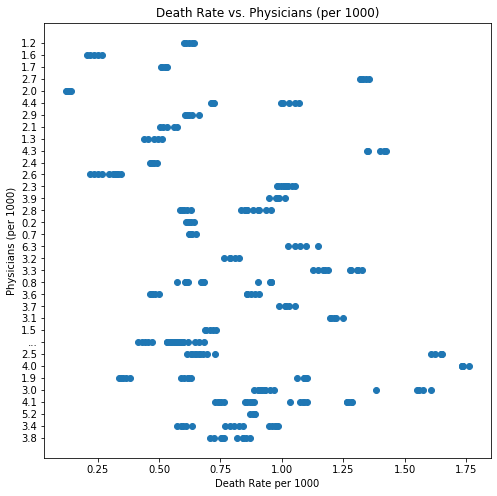

In [340]:
tdr_plot(phys,"Physicians (per 1000)")

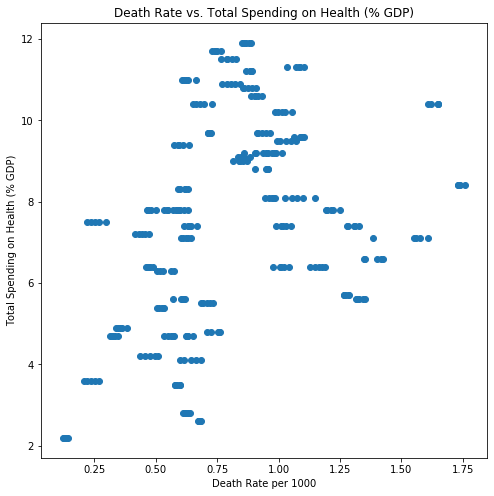

In [341]:
tdr_plot(spend, "Total Spending on Health (% GDP)")

In [342]:
def plot(x, y):
    xmin=x.min()
    ymin=y.min()
    plt.figure(figsize=(8,8))
    plt.scatter(x, y)
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    regress_values = np.array(x) * slope + intercept
    line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x,regress_values,c="purple")
    plt.annotate(line, (xmin, ymin))

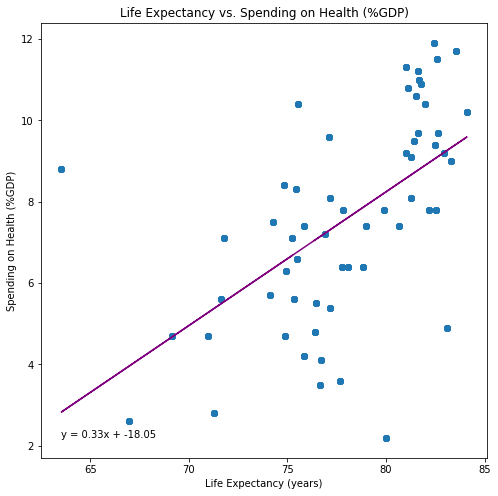

In [345]:
plot(life_expect, spend)
plt.title('Life Expectancy vs. Spending on Health (%GDP)')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Spending on Health (%GDP)')
plt.savefig('Output/life_expectancy_vs_health_spending.png')

In [310]:
# # Plotting Health Care Index vs. Total Death Rate
# spend = new_df["Total expenditure (% GDP)"]
# hci = new_df["Health Care Index"]
# tdr = new_df['Total Death Rate']

# plt.figure(figsize=(8,8))
# plt.scatter(tdr, hci)
# plt.ylabel('Health Care Index')
# plt.xlabel('Death Rate per 1000')
# plt.title('Death Rate vs. Health Care Index')

# (slope, intercept, rvalue, pvalue, stderr) = st.linregress(tdr, hci)
# reg_values = np.array(tdr) * slope + intercept
# line = f'y = {str(round(slope,2))}x +{str(round(intercept,2))}'

# plt.plot(tdr, reg_values,c="purple")
# plt.annotate(line,(1.5,65),fontsize=12,color="maroon")
# plt.show

In [316]:
# Countries with highest and lowest death rates
new_df.sort_values(by=['Total Death Rate'], inplace=True, ascending=False)
death_rate_sort = new_df['Country'].unique()
most_deaths = death_rate_sort[0:10]
least_deaths = death_rate_sort[-11:-1]
print(most_deaths)
print(least_deaths)

['Bulgaria' 'Serbia' 'Ukraine' 'Lithuania' 'Romania' 'Hungary' 'Belarus'
 'Croatia' 'Estonia' 'Greece']
['Philippines' 'Turkey' 'Malaysia' 'Israel' 'Lebanon' 'Colombia'
 'Singapore' 'Saudi Arabia' 'Jordan' 'United Arab Emirates']


In [319]:
# Filtering by countries with highest death rates per capita
# .mean() averages between years 2014-2018
most_deaths_df = clean_df[clean_df["Country"].isin(most_deaths)]
md = most_deaths_df.groupby('Country').mean()
md = md.drop('Year',1)

# Convert cause of death values to per capita values (per 1000)
md_pop = pd.Series(md['Population'])
# Isolate desired values to calculate
cause_md = md.iloc[:,0:4]
cause_md
# Divide values, then place back into df
k = cause_md.div(md_pop, axis = 0)*1000
md.iloc[:,0:4] = k
md

,Neoplasms,Lower respiratory infections,Cardiovascular diseases,Chronic respiratory diseases,Total Number of Deaths,Life Expectancy at birth,GDP per capita ($),Total expenditure (% GDP),Health Care Index,Population,Total Death Rate
Country,,,,,,,,,,,
Belarus,2.014158,0.120338,8.000241,0.237854,120986.6,74.129268,5750.8,5.7,53.76,9498264.0,1.273776
Bulgaria,3.179871,0.275355,10.913140,0.416679,123111.8,74.814634,6846.8,8.4,54.03,7075947.0,1.739863
Croatia,3.438355,0.125202,5.804587,0.449312,50142.0,77.826829,11479.4,7.8,65.49,4124531.0,1.215702
Estonia,2.914868,0.170489,5.935247,0.228483,15303.8,78.092683,17112.0,6.4,71.30,1317384.0,1.161681
Greece,3.124240,0.505027,4.628255,0.547594,116220.6,81.287805,17788.0,8.1,53.92,10754679.0,1.080652
Hungary,3.508165,0.120536,6.256683,0.614469,127318.0,75.817073,12350.6,7.4,53.46,9787966.0,1.300761
Lithuania,2.896829,0.198840,7.660153,0.282350,39267.0,75.480488,14383.7,6.6,68.74,2828403.0,1.388310
Romania,2.662594,0.323128,7.403566,0.398074,261045.6,75.309756,9120.7,5.6,53.11,19587290.0,1.332730
Serbia,4.021189,0.222195,8.867947,0.555402,114872.0,75.539024,5238.6,10.4,53.86,7020858.0,1.636153


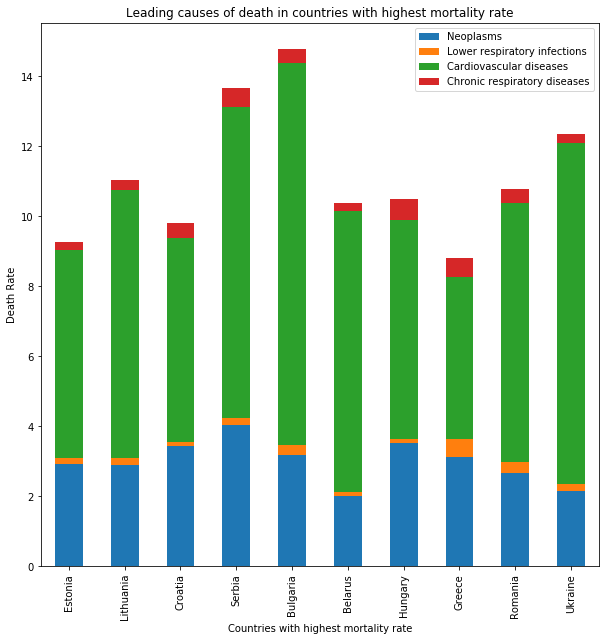

In [350]:
k.loc[md.sum(axis=1).sort_values().index].plot.bar(stacked=True, figsize=(10,10))
plt.title('Leading causes of death in countries with highest mortality rate')
plt.ylabel('Death Rate')
plt.xlabel('Countries with highest mortality rate')
plt.savefig('Output/leading_cause_death_in_deadliest_countries.png')

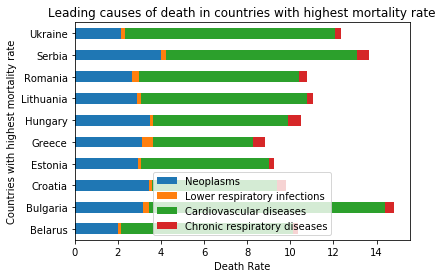

In [351]:
ax = k.plot.barh(stacked=True)
plt.title('Leading causes of death in countries with highest mortality rate')
plt.xlabel('Death Rate')
plt.ylabel('Countries with highest mortality rate')
plt.savefig('Output/leading_cause_death_in_deadliest_countries_horizontal.png')

In [324]:
# Filtering by countries with lowest death rates per capita
least_deaths_df = clean_df[clean_df["Country"].isin(least_deaths)]
ld = least_deaths_df.groupby('Country').mean()
ld = ld.drop('Year',1)

# Convert cause of death values to per capita values (per 1000)
ld_pop = pd.Series(ld['Population'])
# Isolate desired values to calculate
cause_ld = ld.iloc[:,0:4]
cause_ld
# Divide values, then place back into df
j = cause_ld.div(ld_pop, axis = 0)*1000
ld.iloc[:,0:4] = j
ld

,Neoplasms,Lower respiratory infections,Cardiovascular diseases,Chronic respiratory diseases,Total Number of Deaths,Life Expectancy at birth,GDP per capita ($),Total expenditure (% GDP),Health Care Index,Population,Total Death Rate
Country,,,,,,,,,,,
Colombia,0.921460,0.152520,1.336261,0.323531,216979.8,76.925000,6056.1,7.2,65.79,48901066.0,0.443712
Israel,1.546486,0.187093,1.298268,0.214132,41625.8,82.551220,37129.4,7.8,74.78,8713300.0,0.477727
Jordan,0.468506,0.095427,0.960061,0.070108,24951.8,74.292000,4940.1,7.5,71.92,9779173.0,0.255152
Lebanon,1.047495,0.131858,2.322063,0.170085,32304.0,78.833000,8571.4,6.4,64.28,6811873.0,0.474231
Malaysia,0.870708,0.638591,1.635375,0.200000,147937.0,75.828000,9768.4,4.2,65.99,31105028.0,0.475605
Philippines,0.702545,0.550893,1.831232,0.304089,586222.6,70.952000,2904.2,4.7,69.16,105173264.0,0.557387
Saudi Arabia,0.343743,0.133943,1.266903,0.105785,108568.4,74.874000,20710.6,4.7,60.41,33099147.0,0.328010
Singapore,1.115737,0.544701,1.092823,0.115248,20021.0,83.095122,52239.0,4.9,69.87,5612253.0,0.356737
Turkey,1.215520,0.169920,2.099268,0.401586,422662.4,77.161000,9125.8,5.4,71.68,81101892.0,0.521150


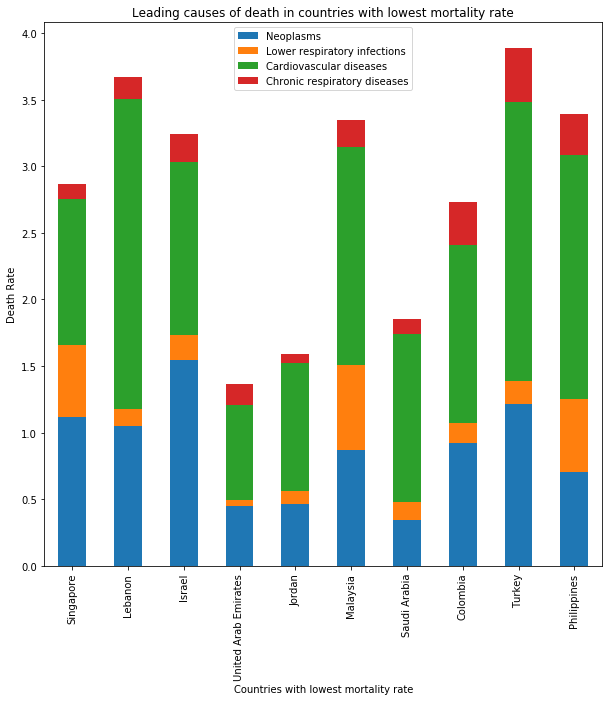

In [352]:
j.loc[ld.sum(axis=1).sort_values().index].plot.bar(stacked=True, figsize=(10,10))
plt.title('Leading causes of death in countries with lowest mortality rate')
plt.ylabel('Death Rate')
plt.xlabel('Countries with lowest mortality rate')
plt.savefig('Output/leading_cause_death_in_least_deadly_countries.png')

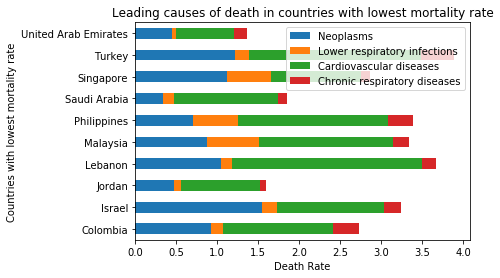

In [355]:
ax = j.plot.barh(stacked=True)
plt.title('Leading causes of death in countries with lowest mortality rate')
plt.xlabel('Death Rate')
plt.ylabel('Countries with lowest mortality rate')
plt.savefig('Output/leading_cause_death_in_least_deadly_countries_horizontal.png')